## Introduction
This lesson focuses on univariate summaries, where we explore each variable separately. This is useful for answering questions about each individual feature. Variables can typically be classified as quantitative (i.e., numeric) or categorical (i.e., discrete). Depending on its type, we may want to choose different summary metrics and visuals to use.

##### Import  Libraries and Dataset

In [1]:
import pandas as pd
import numpy as np

In [3]:
movies = pd.read_csv("movies.csv")

##### Exercise 1
Start by inspecting the first 5 rows of movies using the ``.head()`` method and print the result.<br>
How many quantitative and categorical variables do you see?

In [5]:
movies.head()
# Quantitative Variables: production_budget, domestic_gross, worldwide_gross
# Categorical Variables: genre, mpaa_rating

,movie,production_budget,domestic_gross,worldwide_gross,mpaa_rating,genre
0,Evan Almighty,175000000.0,100289690.0,1.741313e+08,PG,Comedy
1,Waterworld,175000000.0,88246220.0,2.642462e+08,PG-13,Action
2,King Arthur: Legend of the Sword,175000000.0,39175066.0,1.399507e+08,PG-13,Adventure
3,47 Ronin,175000000.0,38362475.0,1.517168e+08,PG-13,Action
4,Jurassic World: Fallen Kingdom,170000000.0,416769345.0,1.304866e+09,PG-13,Action


##### Exercise 2
Use the ``.describe()`` method to display the summary statistics for movies and print the result. <br>
Make sure to show statistics for all columns in the DataFrame.<br>
What kinds of metrics are displayed for quantitative columns versus categorical columns?

In [7]:
movies.describe(include="all").T
#Summary statistics like mean, standard deviation, and percentiles are well-suited for describing quantitative variables, 
#while categorical variables can be summarized by the count and frequency of their distinct categorical values.

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
movie,3401,3400,Tau ming chong,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
production_budget,3401.0,NaN,NaN,NaN,33284743.236401,34892390.590774,250000.0,9000000.0,20000000.0,45000000.0,175000000.0
domestic_gross,3401.0,NaN,NaN,NaN,45421793.45516,58825660.558476,0.0,6118683.0,25533818.0,60323786.0,474544677.0
worldwide_gross,3401.0,NaN,NaN,NaN,94115117.215819,140918241.815941,0.0,10618813.0,40159017.0,117615211.0,1304866322.0
mpaa_rating,3264,4,R,1514,NaN,NaN,NaN,NaN,NaN,NaN,NaN
genre,3401,5,Drama,1236,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Central Tendency for Quantitative Data
For quantitative variables, we often want to describe the central tendency, or the “typical” value of a variable. For example, what is the typical cost of rent in New York City?

There are several common measures of central tendency:

- **Mean:** The average value of the variable, calculated as the sum of all values divided by the number of values.
- **Median:** The middle value of the variable when sorted.
- **Mode:** The most frequent value of the variable.
- **Trimmed mean:** The mean excluding x percent of the lowest and highest data points.

##### Exercise 3
Find the mean `production_budget` for all movies and save it to a variable called `mean_budget`. Print `mean_budget` to see the result.

In [8]:
movies.head()

,movie,production_budget,domestic_gross,worldwide_gross,mpaa_rating,genre
0,Evan Almighty,175000000.0,100289690.0,1.741313e+08,PG,Comedy
1,Waterworld,175000000.0,88246220.0,2.642462e+08,PG-13,Action
2,King Arthur: Legend of the Sword,175000000.0,39175066.0,1.399507e+08,PG-13,Adventure
3,47 Ronin,175000000.0,38362475.0,1.517168e+08,PG-13,Action
4,Jurassic World: Fallen Kingdom,170000000.0,416769345.0,1.304866e+09,PG-13,Action


In [9]:
mean_budget = movies["production_budget"].mean()
mean_budget

33284743.23640106

##### Exercise 4
Save the median budget to a variable called `med_budget` and print the result.

In [11]:
med_budget = movies["production_budget"].median()
med_budget

20000000.0

##### Exercise 5
Save the mode to a variable called `mode_budget` and print the result.<br>
How do the mean, median, and mode of movie budgets compare to each other?

In [12]:
mode_budget = movies["production_budget"].mode()
mode_budget

0    20000000.0
dtype: float64

##### Exercise 6
Find the mean of the budget after removing 20% of the lowest and highest data points. <br>
Save the trimmed mean to a variable called `trmean_budget` and print the result.<br>
How does trimming the most extreme data points affect the mean budget?

In [13]:
from scipy.stats import trim_mean

In [15]:
trmean_budget = trim_mean(movies["production_budget"], proportiontocut=0.2)
trmean_budget
#The trimmed mean is just under $24M, 
#   which is much lower compared to the original mean of $33M and also much closer to the median and mode values. 
#This makes sense because the mean is affected by outliers,
#   so removing the extreme values can bring the mean closer to what would be considered a representative, “typical” budget value.

23949546.79078883

## Spread for Quantitative Data
The spread of a quantitative variable describes the amount of variability. This is important because it provides context for measures of central tendency. For example, if there is a lot of variability in New York City rent prices, we can be less certain that the mean or median price is representative of what the typical rent is.

There are several common measures of spread:

- **Range:** The difference between the maximum and minimum values of a variable.
- **Interquartile range (IQR):** The difference between the 75th and 25th percentile values.
- **Variance:** The average of the squared distance from each data point to the mean.
- **Standard deviation (SD):** The square root of the variance.
- **Mean absolute deviation (MAD):** The mean absolute value of the distance between each data point and the mean.

##### Exercise 7
Find the range for `production_budget` and save it to a variable called `range_budget`. Print `range_budget` to see the result.

In [17]:
range_budget = movies["production_budget"].max() - movies["production_budget"].min()
range_budget

174750000.0

##### Exercise 8
Save the interquartile range for budget to a variable called `iqr_budget` and print the result.

In [20]:
from scipy.stats import iqr
iqr_budget = iqr(movies["production_budget"])
iqr_budget

36000000.0

##### Exercise 9
Save the variance to a variable called `var_budget` and print the result.

In [22]:
var_budget = movies["production_budget"].var()
var_budget

1217478921139135.5

##### Exercise 10
Save the standard deviation to a variable called `std_budget` and print the result.

In [24]:
std_budget = movies["production_budget"].std()
std_budget

34892390.59077402

##### Exercise 11
Save the mean absolute deviation to a variable called `mad_budget` and print the result.

In [26]:
mad_budget = movies["production_budget"].mad()
mad_budget

26090426.818846796

## Visualizing Quantitative Variables
While summary statistics are certainly helpful for exploring and quantifying a feature, we might find it hard to wrap our minds around a bunch of numbers. This is why data visualization is such a powerful element of EDA.

For quantitative variables, boxplots and histograms are two common visualizations. These plots are useful because they simultaneously communicate information about minimum and maximum values, central location, and spread. Histograms can additionally illuminate patterns that can impact an analysis (e.g., skew or multimodality).

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

##### Exercise 12
Create a boxplot for `production_budget` using the `boxplot()` function from `seaborn`.<br>
Don’t forget to display the plot using `plt.show()` and close the plot using `plt.close()` .

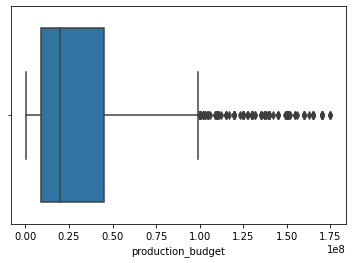

In [30]:
sns.boxplot(data=movies, x="production_budget")
plt.show()
plt.close()

##### Exercise 13
Create a histogram for `production_budget` using the `histplot()` function from `seaborn`.<br>
From the plots, what do you notice about the distribution of movie budgets?

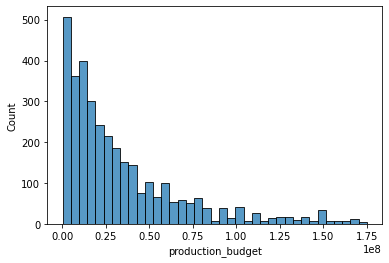

In [36]:
sns.histplot(data=movies, x="production_budget")
plt.show()
plt.close()

#Both plots show that the distribution of movie budgets is skewed to the right, 
#   with some outlier movies having extremely high budgets. 
#This is consistent with the high mean budget value we saw earlier, since the mean is affected by skewness and outliers.

## Value Counts for Categorical Data
When it comes to categorical variables, the measures of central tendency and spread that worked for describing numeric variables, like mean and standard deviation, generally becomes unsuitable when we’re dealing with discrete values. Unlike numbers, categorical values are not continuous and oftentimes do not have an intrinsic ordering.

Instead, a good way to summarize categorical variables is to generate a frequency table containing the count of each distinct value. For example, we may be interested to know how many of the New York City rental listings are from each borough. Related, we can also find which borough has the most listings.

##### Exercise 14
Find the number of movies in each genre and save the counts to a variable called `genre_counts`. Print `genre_counts` to see the result.

In [40]:
genre_counts = movies["genre"].value_counts()
genre_counts

Drama        1236
Comedy        813
Action        573
Adventure     481
Horror        298
Name: genre, dtype: int64

##### Exercise 15
Find the proportion of movies in each genre and save them to a variable called `genre_props`. Print `genre_props` to see the result.

In [42]:
genre_props = movies["genre"].value_counts(normalize=True)
genre_props

Drama        0.363423
Comedy       0.239047
Action       0.168480
Adventure    0.141429
Horror       0.087621
Name: genre, dtype: float64

## Visualizing Categorical Variables
For categorical variables, bar charts and pie charts are common options for visualizing the count (or proportion) of values in each category. They can also convey the relative frequencies of each category.

##### Exercise 16
Create a bar chart for `genre` using the ``countplot()`` function from ``seaborn``. <br>
Don’t forget to display the plot using ``plt.show()`` and close the plot using ``plt.close()``.

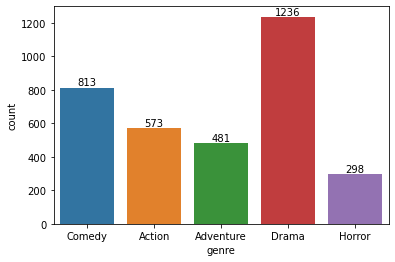

In [45]:
ax = sns.countplot(data=movies, x="genre")
for container in ax.containers:
    ax.bar_label(container)
plt.show()
plt.close()

##### Exercise 17
Create a pie chart for ``genre`` using the ``.pie()`` method from pandas.<br>
From the plots, what do you notice about the relative frequencies of movie genres?

In [79]:
movies["genre"].value_counts().index

Index(['Drama', 'Comedy', 'Action', 'Adventure', 'Horror'], dtype='object')

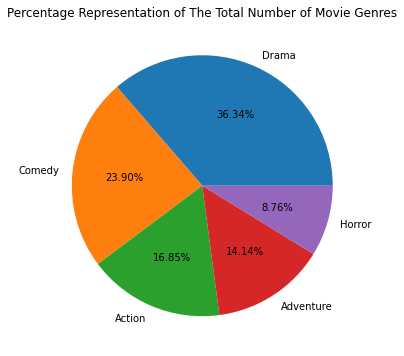

In [85]:
plt.figure(figsize=(6,6))
plt.pie(movies["genre"].value_counts(), autopct="%.2f%%", labels=movies["genre"].value_counts().index)
plt.title("Percentage Representation of The Total Number of Movie Genres")

plt.show()
plt.close()